In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
from pymol import cmd, CmdException
from matplotlib import cm
from scipy import stats

In [2]:
# load dataframes
df_A501 = pd.read_csv("A501_results.csv")
df_3DAC = pd.read_csv("3DAC_results.csv")


In [3]:
# check head files
df_A501

,ID,name,old_name,sequence,sequence length,model_1_plddt,model_2_plddt,disulfide_bond,hydrogen_bond,salt_bridge,surface,SASA,secondary_structure
0,A501_1,WP_011250482.1,A501_001,MAKKGAGATRGISPVRPTRALPIGAYLKVADNSGAKVIQIIGVVGY...,141.0,90.681015,90.474789,0.0,121.0,2.0,16448.00586,8913.559570,LLLLLLLLLLLLLLLLLLLLLLLSSSSSSLLLLLLSSSSSSSSLLL...
1,A501_2,WP_042692804.1,A501_002,MGKSLIQQRRGKGTTTFRAPSHRYRGAVKYVPLNVVKEKTLRGVVE...,239.0,94.120890,93.913161,0.0,183.0,2.0,28280.49805,16099.310550,LLLLLHHHHHHHLLHHHLLLHHHLLLLLLLLLHHHHLLLLSSSSSS...
2,A501_3,WP_042693005.1,A501_003,MKVVRFGVSVPEELLEKFDRIIEEKGYVNRSEAIRDLMRDFIIRHE...,138.0,95.654313,95.708373,0.0,146.0,5.0,16841.46875,10151.217770,LLLLLLLLLLLHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHH...
3,A501_4,WP_050001839.1,A501_004,MDCTKDYCVKDLSLATSGEKKIDWVSRFMPVLQTIRREFEREKPFK...,421.0,96.819289,96.925328,1.0,523.0,19.0,49283.14063,19119.728520,LSSSLLSSSLLHHHHHHHHHHHHHHHHHLHHHHHHHHHHHHHLLLL...
4,A501_5,WP_050001842.1,A501_005,MRRDYTLYLFASLGSFLIAYIALPLVIIFAKQLMDWEMLVKTLHDP...,247.0,95.500631,95.463742,0.0,316.0,3.0,28950.64258,15324.120120,LLLLHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHLHHHHHHHHHLH...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,A501_2176,WP_081947262.1,A501_non_1874,MAIKDKKALEGLIELLDDNMPGIRGDALLILGMIAQQNREVLGPHI...,158.0,95.162745,95.243818,0.0,194.0,1.0,16285.09180,8806.268555,LLLLLHHHHHHHHHHHHLLLHHHHHHHHHHHHHHHHHLHHHHHLLH...
2176,A501_2177,WP_081947263.1,A501_non_1875,MLRGLDWDSNVYLFRSGKEALVVDTGTGDNVERYFSLWLSEGYLNG...,215.0,97.028845,96.856313,0.0,260.0,9.0,21871.41406,10185.756840,LLLLLLLLLLLSSSSSLLSSSSSLLLLLLLHHHHHHHHHHHLLLLL...
2177,A501_2178,WP_081947264.1,A501_non_1876,MIEARDLKKYFGSIHALDGVTVSIPEGVTLILGPNGGGKSTFLKLA...,248.0,89.287731,89.250260,0.0,238.0,2.0,25094.01367,14640.710940,SSSSSLSSSSSLLSSSSSSSLSSSLLLSSSSSLLLLLLHHHHHHHH...
2178,A501_2179,WP_081947265.1,A501_non_1877,MAGTVWFTYHFASQESLNDYIGDEVWYVPASRNVLHRLGVQVTYEH...,456.0,94.371576,94.345574,0.0,557.0,4.0,46575.35156,22322.859380,LHHHHHHHHHHHHLLLLLLLLLHHHHHHHHHHHHHHHHLLLLLSSS...


In [4]:
df_A501[df_A501["sequence length"].notnull()]["salt_bridge"].to_numpy().max()

37.0

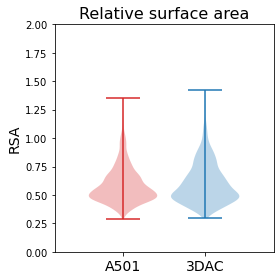

In [5]:
plt.figure(figsize=(4,4))

parts = plt.violinplot(df_A501[df_A501["sequence length"].notnull()]["SASA"]/df_A501[df_A501["sequence length"].notnull()]["surface"],positions=[0])

for pc in parts['bodies']:
    pc.set_facecolor('tab:red')
parts['cbars'].set_color('tab:red')
parts['cbars'].set_label('A501')
parts['cmaxes'].set_color('tab:red')
parts['cmins'].set_color('tab:red')




parts = plt.violinplot(df_3DAC[df_3DAC["sequence length"].notnull()]["SASA"]/df_3DAC[df_3DAC["sequence length"].notnull()]["surface"],positions=[0.6])

for pc in parts['bodies']:
    pc.set_facecolor('tab:blue')
parts['cbars'].set_color('tab:blue')
parts['cbars'].set_label('3DAC')
parts['cmaxes'].set_color('tab:blue')
parts['cmins'].set_color('tab:blue')

plt.xlim(-0.5,1.1)
plt.ylim(0,2)

plt.title("Relative surface area",fontsize=16)
plt.ylabel("RSA",fontsize=14)
plt.xticks([0,0.6],["A501","3DAC"],fontsize=14)
plt.tight_layout()

plt.savefig("Figure/Figure_RSA.pdf")
plt.savefig("Figure/Figure_RSA.png")

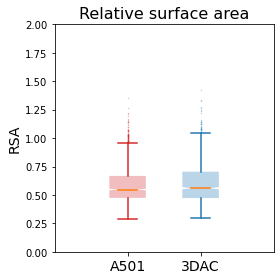

In [6]:
plt.figure(figsize=(4,4))

box = plt.boxplot(df_A501[df_A501["sequence length"].notnull()]["SASA"]/df_A501[df_A501["sequence length"].notnull()]["surface"],notch=True,positions=[0],sym='k.',patch_artist=True)

for parts in box['boxes']:
    parts.set_color("tab:red")
    parts.set_alpha(0.3)
    parts.set_edgecolor("None")
box['whiskers'][0].set_color("tab:red")
box['whiskers'][0].set_linewidth(1.5)
box['whiskers'][1].set_color("tab:red")
box['whiskers'][1].set_linewidth(1.5)
box['caps'][0].set_color("tab:red")
box['caps'][0].set_linewidth(1.5)
box['caps'][1].set_color("tab:red")
box['caps'][1].set_linewidth(1.5)
box['medians'][0].set_color("tab:orange")
box['medians'][0].set_linewidth(1.5)
box['fliers'][0].set_markeredgecolor("None")
box['fliers'][0].set_markerfacecolor("tab:red")
box['fliers'][0].set_markersize(3)
box['fliers'][0].set_alpha(0.3)




box = plt.boxplot(df_3DAC[df_3DAC["sequence length"].notnull()]["SASA"]/df_3DAC[df_3DAC["sequence length"].notnull()]["surface"],notch=True,positions=[0.3],sym='k.',patch_artist=True)

for parts in box['boxes']:
    parts.set_color("tab:blue")
    parts.set_alpha(0.3)
    parts.set_edgecolor("None")
box['whiskers'][0].set_color("tab:blue")
box['whiskers'][0].set_linewidth(1.5)
box['whiskers'][1].set_color("tab:blue")
box['whiskers'][1].set_linewidth(1.5)
box['caps'][0].set_color("tab:blue")
box['caps'][0].set_linewidth(1.5)
box['caps'][1].set_color("tab:blue")
box['caps'][1].set_linewidth(1.5)
box['medians'][0].set_color("tab:orange")
box['medians'][0].set_linewidth(1.5)
box['fliers'][0].set_markeredgecolor("None")
box['fliers'][0].set_markerfacecolor("tab:blue")
box['fliers'][0].set_markersize(3)
box['fliers'][0].set_alpha(0.3)




plt.xlim(-0.3,0.6)
plt.ylim(0,2)

plt.title("Relative surface area",fontsize=16)
plt.ylabel("RSA",fontsize=14)
plt.xticks([0,0.3],["A501","3DAC"],fontsize=14)
plt.tight_layout()

plt.savefig("Figure/Figure_RSA_box.pdf")
plt.savefig("Figure/Figure_RSA_box.png")

In [8]:
print(stats.ranksums(df_A501[df_A501["sequence length"].notnull()]["SASA"]/df_A501[df_A501["sequence length"].notnull()]["surface"],df_3DAC[df_3DAC["sequence length"].notnull()]["SASA"]/df_3DAC[df_3DAC["sequence length"].notnull()]["surface"]))


RanksumsResult(statistic=-1.6092221535851114, pvalue=0.10756777394025757)
